# DECISION TREE CLASSIFIER

This is a self learning begineer level decisionn tree clasifier algorithm

importing important libraries

In [98]:
import pandas as pd
import numpy as np
import seaborn as sns

In [99]:
df=pd.read_csv(r"C:\ravi\ml\bank.csv")

# NORMALIZING and EDA

In [100]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


checking the top rows of the dataset

In [101]:
df.shape 
# checking the shape of the data 
# there are total 11162 rows and 17 columns

(11162, 17)

In [102]:
df.columns
#total no of columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [103]:
df.isna().sum()
# checking if there is any Nas in the data set

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [104]:
df.drop(['contact','day','month','default'],axis=1,inplace=True)
# dropping the not necessary columns from the dataset

In [105]:
df.columns
# rechecking the remaining columns

Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'loan',
       'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'deposit'],
      dtype='object')

In [106]:
df['job'].unique()
# checking the different variables in job columns

array(['admin.', 'technician', 'services', 'management', 'retired',
       'blue-collar', 'unemployed', 'entrepreneur', 'housemaid',
       'unknown', 'self-employed', 'student'], dtype=object)

In [107]:
df['job'].value_counts()
# counting the total no of job for the each sectors

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

In [108]:
df['balance'].describe()
# checking the min , max and quartile of the  balance

count    11162.000000
mean      1528.538524
std       3225.413326
min      -6847.000000
25%        122.000000
50%        550.000000
75%       1708.000000
max      81204.000000
Name: balance, dtype: float64

In [109]:
df.education.unique()
# checking different education column variables

array(['secondary', 'tertiary', 'primary', 'unknown'], dtype=object)

In [110]:
df.education.nunique()

4

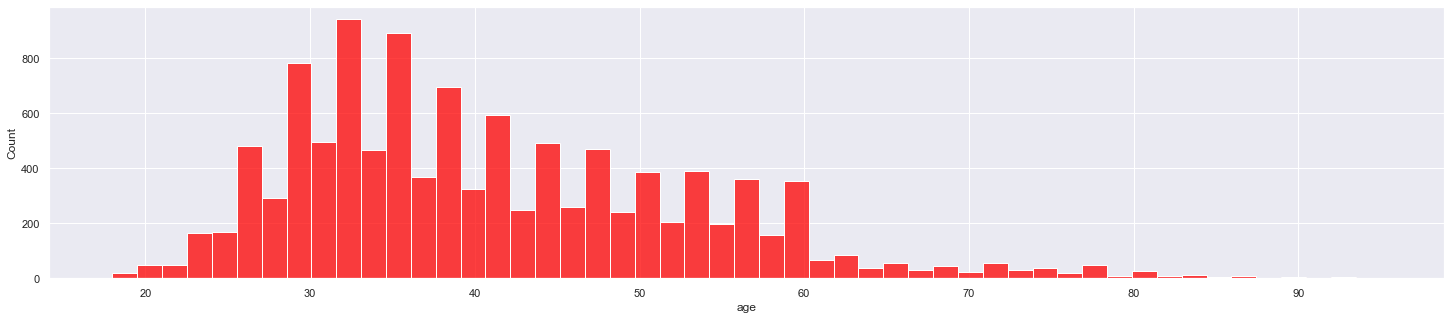

In [111]:
sns.histplot(df.age,color='red')
sns.set(rc={'figure.figsize':(25,5)})

in this plot we can see the majority of age lies in between 30 to 60 years,  very few lies more than 60 years we can consider them as an outliers they cann skew our data

C:\Users\ravit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


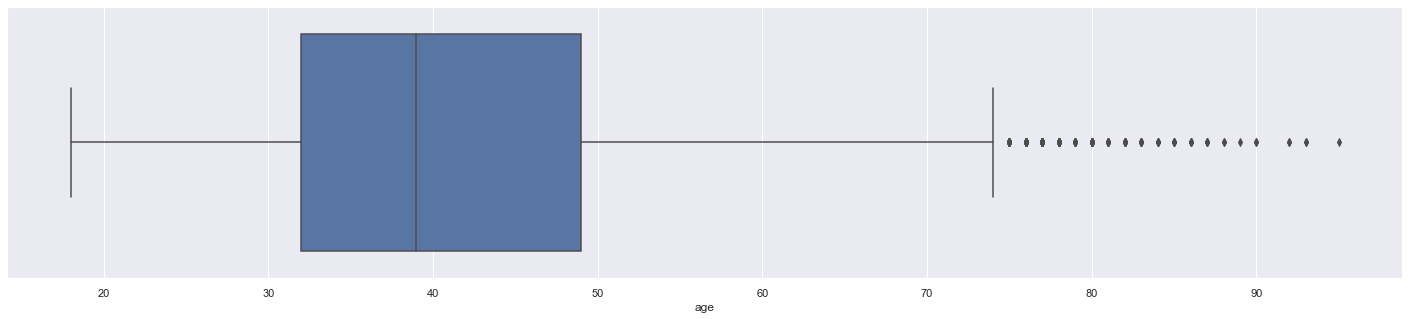

In [112]:
sns.boxplot(df.age)
sns.set(rc={'figure.figsize':(25,5)})

C:\Users\ravit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


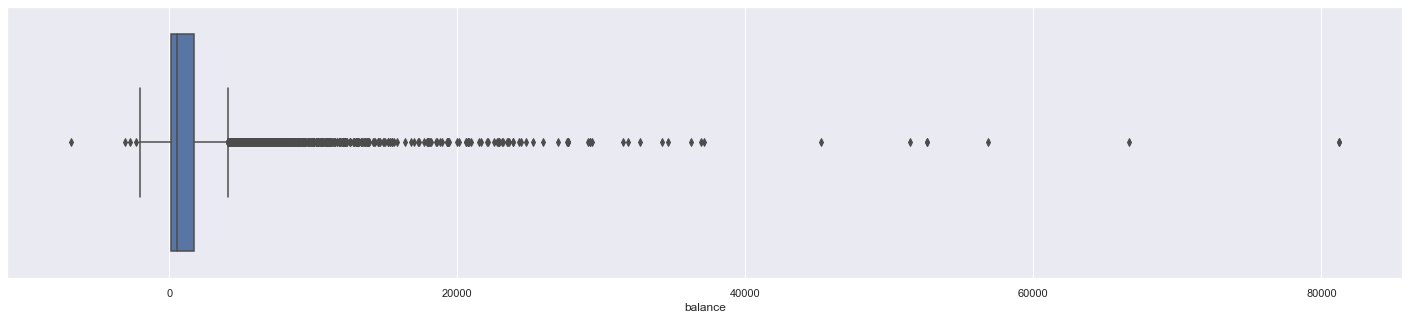

In [113]:
sns.boxplot(df.balance)
sns.set(rc={'figure.figsize':(25,5)})

In [114]:
df.marital.value_counts()
# counting the maritial status of each categories

married     6351
single      3518
divorced    1293
Name: marital, dtype: int64

In [115]:
df.housing.replace(('yes', 'no'), (1, 0), inplace=True)
#machine learning algorithm does not works on characters so are converting them into 1,0,where 1 stands for 'yes' 
# and 0 stands for'no'.

In [116]:
df.loan.replace(('yes','no'),(1,0),inplace=True)
#machine learning algorithm does not works on characters so are converting them into 1,0,where 1 stands for 'yes' 
# and 0 stands for'no'.

In [117]:
df.deposit.replace(('yes','no'),(1,0),inplace=True)
#machine learning algorithm does not works on characters so are converting them into 1,0,where 1 stands for 'yes'
# # and 0 stands for'nohere depositebis our target variable
# here deposit is our target variable

In [118]:
df_dummies = pd.get_dummies(data=df, columns = ['job', 'marital', 'education', 'poutcome'], \
                                   prefix = ['job', 'marital', 'education', 'poutcome'])
# using get_dummies to create dummiyes of these columns

In [147]:
df_dummies.columns
# checking totol columns after creating dummies

Index(['age', 'balance', 'housing', 'loan', 'duration', 'campaign', 'pdays',
       'previous', 'deposit', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'poutcome_failure',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown'],
      dtype='object')

In [149]:
df_dummies
# created new dataset name df_dummies

,age,balance,housing,loan,duration,campaign,pdays,previous,deposit,job_admin.,...,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,59,2343,1,0,1042,1,-1,0,1,1,...,1,0,0,1,0,0,0,0,0,1
1,56,45,0,0,1467,1,-1,0,1,1,...,1,0,0,1,0,0,0,0,0,1
2,41,1270,1,0,1389,1,-1,0,1,0,...,1,0,0,1,0,0,0,0,0,1
3,55,2476,1,0,579,1,-1,0,1,0,...,1,0,0,1,0,0,0,0,0,1
4,54,184,0,0,673,2,-1,0,1,1,...,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,1,0,257,1,-1,0,0,0,...,0,1,1,0,0,0,0,0,0,1
11158,39,733,0,0,83,4,-1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
11159,32,29,0,0,156,2,-1,0,0,0,...,0,1,0,1,0,0,0,0,0,1
11160,43,0,0,1,9,2,172,5,0,0,...,1,0,0,1,0,0,1,0,0,0


# TRAINING AND PREDICTING 

X  is our features and Y is our targeted variable 
where 
x =age', 'balance', 'housing', 'loan', 'duration', 'campaign', 'pdays',
       'previous', , 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'poutcome_failure',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown'
       
  y ='deposit'

In [120]:
x=df_dummies.drop('deposit',axis=1)

In [121]:
y=df_dummies['deposit']

In [122]:
x.head()

,age,balance,housing,loan,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,59,2343,1,0,1042,1,-1,0,1,0,...,1,0,0,1,0,0,0,0,0,1
1,56,45,0,0,1467,1,-1,0,1,0,...,1,0,0,1,0,0,0,0,0,1
2,41,1270,1,0,1389,1,-1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
3,55,2476,1,0,579,1,-1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
4,54,184,0,0,673,2,-1,0,1,0,...,1,0,0,0,1,0,0,0,0,1


In [123]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: deposit, dtype: int64

In [124]:
from sklearn.model_selection import train_test_split

In [125]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=41)

In [126]:
x_train.shape

(7813, 31)

In [127]:
x_test.shape

(3349, 31)

In [128]:
y_train.shape

(7813,)

In [129]:
y_test.shape

(3349,)

In [130]:
from sklearn.tree import DecisionTreeClassifier

In [131]:
dtc=DecisionTreeClassifier(criterion='gini')

In [132]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [133]:
y_pred=dtc.predict(x_test)

In [134]:
y_pred[:10]

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 1], dtype=int64)

In [135]:
y_test.head(10)

4831    1
6751    0
8010    0
6732    0
5844    0
1501    1
3618    1
3520    1
4352    1
9528    0
Name: deposit, dtype: int64

Comparing predicted values with actual values
where our predicted variable is y_pred
and actuak variable is y_test_head

In [136]:
from sklearn.metrics import mean_squared_error

In [137]:
mse=mean_squared_error(y_pred,y_test)

In [138]:
mse
# checking the error of our model 
# 26% error is actually pretty good we can say that out model is perfectly fit

0.26873693639892504

In [139]:
from sklearn.metrics import confusion_matrix

In [140]:
confusion_matrix(y_pred,y_test)

array([[1295,  422],
       [ 478, 1154]], dtype=int64)

In [141]:
(1302+1154)/(1302+422+471+1154)
# checking model accuracy 

0.7333532397730665

In [142]:
y_pred[:20]

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0],
      dtype=int64)

In [67]:
y_test.head(20)

4831    1
6751    0
8010    0
6732    0
5844    0
1501    1
3618    1
3520    1
4352    1
9528    0
5548    0
1141    1
4609    1
7527    0
5435    0
3001    1
1095    1
1769    1
8488    0
8396    0
Name: deposit, dtype: int64